In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('../data/data.csv')
np.set_printoptions(threshold=np.nan)

In [2]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df[:10])

,case,event,startTime,completeTime,penalty_JLP5,penalty_JLP6,penalty_JLP7,penalty_AGP,penalty_JLP1,penalty_JLP2,penalty_JLP3,penalty_C16,payment_actual3,payment_actual2,payment_actual1,payment_actual0,rejected,amount_applied1,year,penalty_B16,amount_applied0,amount_applied3,amount_applied2,penalty_B5F,penalty_B6,penalty_GP1,penalty_B4,penalty_B5,penalty_AVGP,penalty_B2,selected_random,penalty_B3,cross_compliance,penalty_AVJLP,applicant,young farmer,penalty_C9,penalty_ABP,department,penalty_AVBP,small farmer,penalty_AVUVP,penalty_C4,identity:id,penalty_V5,area,risk_factor,penalty_CC,redistribution,application,penalty_amount0,penalty_amount1,penalty_amount2,penalty_AJLP,penalty_amount3,greening,number_parcels,selected_risk,penalty_BGKV,penalty_BGK,penalty_BGP,basic payment,program-id,penalty_AUVP,selected_manually,subprocess,org:resource,event_identity:id,eventid,docid_uuid,docid,doctype,success,activity,note
0,8b99873a6136cfa6,mail income,2015/05/08 06:00:00.000,2015/05/08 06:00:00.000,False,False,False,False,False,False,False,False,NaN,NaN,NaN,960.35,False,NaN,2015,False,960.35,NaN,NaN,False,False,False,False,False,False,False,False,False,0.0,False,b3b1bafcf8a5c359,False,False,False,e7,False,True,False,False,B15FB890-574E-4117-B66A-BDFBC4FCAA6E,False,2.6994,1.0,False,True,8b99873a6136cfa6,0.0,NaN,NaN,False,NaN,True,3,False,False,False,False,True,215,False,False,Application,0;n/a,510B5333-731A-40FD-B7D6-FC149E50E961,NaN,CD3DC291-76C6-420A-B3F1-7C808970915B,-18008611495569447,Payment application,True,mail income,none
1,8b99873a6136cfa6,mail valid,2015/05/08 06:00:00.000,2015/05/08 06:00:00.000,False,False,False,False,False,False,False,False,NaN,NaN,NaN,960.35,False,NaN,2015,False,960.35,NaN,NaN,False,False,False,False,False,False,False,False,False,0.0,False,b3b1bafcf8a5c359,False,False,False,e7,False,True,False,False,B15FB890-574E-4117-B66A-BDFBC4FCAA6E,False,2.6994,1.0,False,True,8b99873a6136cfa6,0.0,NaN,NaN,False,NaN,True,3,False,False,False,False,True,215,False,False,Application,0;n/a,F1DD45EF-80BF-46A5-97D6-CC5886DD2D23,NaN,CD3DC291-76C6-420A-B3F1-7C808970915B,-18008611495569447,Payment application,True,mail valid,none
2,8b99873a6136cfa6,mail valid,2015/05/08 06:00:00.000,2015/05/08 06:00:00.000,False,False,False,False,False,False,False,False,NaN,NaN,NaN,960.35,False,NaN,2015,False,960.35,NaN,NaN,False,False,False,False,False,False,False,False,False,0.0,False,b3b1bafcf8a5c359,False,False,False,e7,False,True,False,False,B15FB890-574E-4117-B66A-BDFBC4FCAA6E,False,2.6994,1.0,False,True,8b99873a6136cfa6,0.0,NaN,NaN,False,NaN,True,3,False,False,False,False,True,215,False,False,Main,0;n/a,AA02CA32-D021-4264-A7CB-660A9D603EFC,NaN,7CB69360-6D10-426F-A426-DDE3E24E4334,-18008615298673397,Entitlement application,True,mail valid,none
3,8b99873a6136cfa6,mail valid,2015/05/08 06:00:00.000,2015/05/08 06:00:00.000,False,False,False,False,False,False,False,False,NaN,NaN,NaN,960.35,False,NaN,2015,False,960.35,NaN,NaN,False,False,False,False,False,False,False,False,False,0.0,False,b3b1bafcf8a5c359,False,False,False,e7,False,True,False,False,B15FB890-574E-4117-B66A-BDFBC4FCAA6E,False,2.6994,1.0,False,True,8b99873a6136cfa6,0.0,NaN,NaN,False,NaN,True,3,False,False,False,False,True,215,False,False,Main,0;n/a,097D1E41-3CDB-4652-ABF1-EAEFC0410FA0,NaN,7CB69360-6D10-426F-A426-DDE3E24E4334,-18008615298673397,Entitlement application,True,mail valid,none
4,8b99873a6136cfa6,initialize,2015/06/10 17:16:28.000,2015/06/10 17:16:28.000,False,False,False,False,False,False,False,False,NaN,NaN,NaN,960.35,False,NaN,2015,False,960.35,NaN,NaN,False,False,False,False,False,False,False,False,False,0.0,False,b3b1bafcf8a5c359,False,False,False,e7,False,True,False,False,B15FB890-574E-4117-B66A-BDFBC4FCAA6E,False,2.6994,1.0,False,True,8b99873a6136cfa6,0.0,NaN,NaN,False,NaN,True,3,False,False,False,False,True,215,False,False,Main,fb5fa8,96CBE6E6-9774-4DF8-842B-073F4FDCE2B8,-7.205186e+16,CCBAA174-CDD7-4D32-892E-F14197C65B8A,-72051858488795160,Parcel document,True,initializ

## 分析数据

In [3]:
print('There are', df.case.unique().shape[0], 'cases with', df.case.shape[0], 'events')

There are 43809 cases with 2514266 events


In [4]:
## generate distinct value for each attribute, only need to run once then comment this cell.
# summary_path = '../data/summary/distinct_value_for_each_attribute'
# import os
# if not os.path.exists(summary_path):
#     os.makedirs(summary_path)
# for c in df.columns:
#     filename = summary_path + '/' + str(c) + ".txt"
#     filename = filename.replace(':', '_').replace(' ', '_').replace('-', '_')
#     with open(filename, "w") as f:
#         try:
#             f.write(', '.join(list(df[c].unique())))
#             f.write('\n')
#         except:
#             f.write(', '.join([str(x) for x in list(df[c].unique())]))
#             f.write('\n')

In [5]:
df['startTime'] = pd.to_datetime(df['startTime'])
df['completeTime'] = pd.to_datetime(df['completeTime'])

In [6]:
print('There are', df.groupby('case').first().shape[0], 'cases and', df[df.event=='begin payment'].groupby('case').first().shape[0], 'of them having \'begin payment\'') # how many cases
print('There are', df[df.event=='begin payment'].case.shape[0], '\'begin payment\'')
print('There are', df[(df.event=='abort payment') | (df.event=='finish payment')].case.shape[0], '\'abort payment\' + \'finish payment\'')

There are 43809 cases and 43727 of them having 'begin payment'
There are 80200 'begin payment'
There are 80200 'abort payment' + 'finish payment'


这说明数据在这方面是干净的，即每条 begin payment 一定会与一个 abort payment 或者 finish payment 相配对<br/>
但是有不到 100 条的数据没有 begin payment

In [7]:
print('There are', df[df.startTime != df.completeTime].case.shape[0], 'records whoses startTime != completeTime')

There are 0 records whoses startTime != completeTime


这说明，所有的 startTime 都与 completeTime 相等，即可以把他们合成一个 attribute。

In [8]:
numCol = {}
for c in df.columns:
    numCol[c] = df[c].unique().shape[0]
numCol = pd.Series(numCol, name='numOfUniqueValues')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(numCol)

activity                  41
amount_applied0          440
amount_applied1         2642
amount_applied2          155
amount_applied3           11
applicant              15938
application            43809
area                     437
basic payment              1
case                   43809
completeTime         2144182
cross_compliance          32
department                 4
docid                 225270
docid_uuid            225270
doctype                    8
event                     41
event_identity:id    2514266
eventid              2142773
greening                   1
identity:id            43809
note                     138
number_parcels            74
org:resource             165
payment_actual0        21854
payment_actual1         2309
payment_actual2          108
payment_actual3            7
penalty_ABP                2
penalty_AGP                2
penalty_AJLP               2
penalty_AUVP               2
penalty_AVBP               2
penalty_AVGP               2
penalty_AVJLP 

这说明 basic payment、greening、program-id 是三个无用的 attribute，因为他们只有一个取值。

In [9]:
print('There are', df.loc[~(df.case == df.application)].shape[0], 'records where \'case\' != \'application\'')

There are 0 records where 'case' != 'application'


这说明 application 这个 attribute 也可以删掉

In [10]:
print('-- 每年申请人数 --')
display(df.groupby('year').applicant.nunique())
print('-- 所有年总共申请人数 --')
print(df.applicant.unique().shape[0])

-- 每年申请人数 --


year
2015    14750
2016    14552
2017    14507
Name: applicant, dtype: int64

-- 所有年总共申请人数 --
15938


<a id='applicant_apply_every_year'></a>

In [11]:
applicants = {}
for name, group in df.groupby('year').applicant:
    applicants[name] = group.unique()
applicantslist = []
for v in applicants.values():
    applicantslist.append(set(v))
applicants_every_year = set.intersection(*applicantslist)
print('-- 每年都申请了的人数 --')
print(len(applicants_every_year))

-- 每年都申请了的人数 --
13307


请点[我](#applicant_success_every_year)跳转

In [12]:
df[df.event != df.activity]

,case,event,startTime,completeTime,penalty_JLP5,penalty_JLP6,penalty_JLP7,penalty_AGP,penalty_JLP1,penalty_JLP2,...,subprocess,org:resource,event_identity:id,eventid,docid_uuid,docid,doctype,success,activity,note


event 跟 activity 是一样的

In [13]:
df.groupby('risk_factor').agg(dict(('penalty_amount'+str(i), 'mean') for i in range(4)))

,penalty_amount0,penalty_amount1,penalty_amount2,penalty_amount3
risk_factor,,,,
0.99,245.590000,252.600000,NaN,NaN
1.00,218.494315,732.281278,1214.824002,933.088991


这个 risk_factor 有点迷，弄不大懂...

## 标记 timely

In [14]:
df_withlabel = df.copy()
df_withlabel['timely'] = 1

In [15]:
# type(df[(df.event=='begin payment') | (df.event=='finish payment') | (df.event=='abort payment')].groupby(['case']).groups)
casesHavingBeginPayment = df[df.event=='begin payment'].case.unique().tolist()
dftmp = df.groupby('case').first()
dftmp = dftmp.drop(list(set(dftmp.index.values) - set(casesHavingBeginPayment)))
# alternative for above 2 lines, but muuuuuuuuuuuuuuuuuch slower
# dftmp = df[df.case.isin(casesHavingBeginPayment)]
sy = pd.DatetimeIndex(dftmp.groupby('case').first().startTime).year.tolist()
cy = pd.DatetimeIndex(df[df.event=='begin payment'].groupby('case').first().startTime).year.tolist()

In [16]:
diffIdx = []
for pos, val in enumerate(sy):
    if val != cy[pos]:
        diffIdx.append(pos)
late_begin_payment_indexes = df[df.case.isin(dftmp.iloc[diffIdx].index.values)].index.values
df_withlabel.loc[late_begin_payment_indexes, 'timely'] = 0
late_begin_payment_indexes = None # delete useless variable
sy = None
cy = None

以上三步：<br/>
1. 创建新的 DataFrame：df_withlabel，这是在 df 加上了一个叫 timely 的 attribute，取值 0/1，来分辨哪个 case 是 timely 的
2. 把每个 case 的第一个 event 的时间与这个 case 第一个 begin payment 不在同一年份的 timely 标为 0

In [17]:
no_finish_payment_list = list(set(df.case) - set(df[df.event=='finish payment'].case.unique().tolist()))
print('There are', len(no_finish_payment_list), 'cases having no \'finish payment\' event')
no_finish_payment_indexes = df[df.case.isin(no_finish_payment_list)].index.values
df_withlabel.loc[no_finish_payment_indexes, 'timely'] = 0

There are 88 cases having no 'finish payment' event


把没有 finish payment event 的 case 的 timely 标为 0

In [18]:
dftmp = df.iloc[list(set(df.index.values.tolist()) - set(no_finish_payment_indexes.tolist()))]
by = pd.DatetimeIndex(dftmp[dftmp.event=='begin payment'].groupby('case').first().startTime).year.tolist()
fy = pd.DatetimeIndex(df[df.event=='finish payment'].groupby('case').first().startTime).year.tolist()

In [19]:
diffIdx = []
for pos, val in enumerate(by):
#     print(val, fy[pos])
    if val != fy[pos]:
        diffIdx.append(pos)
print('There are', len(diffIdx), 'cases having: 这个 case 第一个 event 所记录的那年出现 begin payment 但是当年没有 finish payment')

There are 43557 cases having: 这个 case 第一个 event 所记录的那年出现 begin payment 但是当年没有 finish payment


In [20]:
df_withlabel.loc[(~np.isnan(df_withlabel.payment_actual1)) | (~np.isnan(df_withlabel.payment_actual2)) | (~np.isnan(df_withlabel.payment_actual3)), 'timely'] = 0

把 payment_actual{x}, $(x \ne 0)$ 的 record 的 timely 变成 0

<a id='applicant_success_every_year'></a>

In [21]:
print('-- 每年都申请成功了的申请人数 --')
df_withlabel[df_withlabel.applicant.isin(applicants_every_year) & df_withlabel.timely==1].applicant.unique().shape[0]

-- 每年都申请成功了的申请人数 --


13288

请点[我](#applicant_apply_every_year)跳转回去

## 继续分析

In [22]:
dftmp = df_withlabel.drop(columns=['subprocess', 'org:resource', 'event_identity:id', 'eventid', 'docid_uuid', 'docid', 'doctype', 'success', 'activity', 'note', 'startTime', 'completeTime', 'event', 'basic payment', 'program-id', 'greening', 'identity:id']).drop_duplicates().fillna(0)

In [23]:
for i in range(4):
    dftmp['diff'+str(i)] = dftmp['payment_actual'+str(i)] - dftmp['amount_applied'+str(i)]

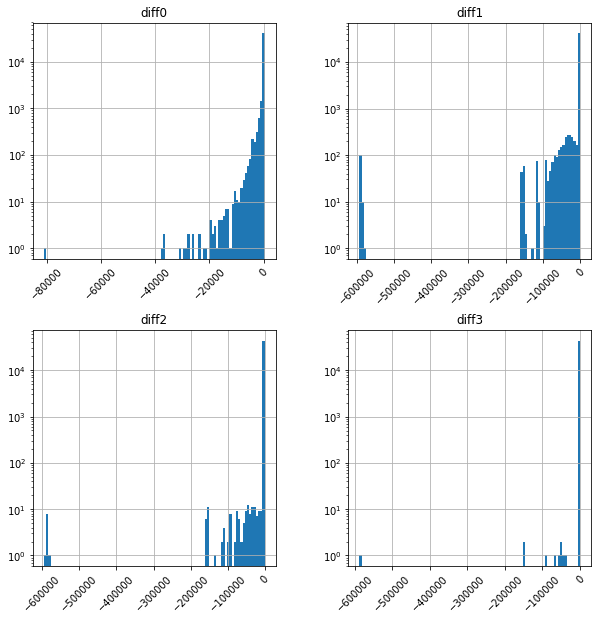

In [24]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)
fig, axes = plt.subplots(2, 2)
for i in range(4):
    dftmp.hist('diff'+str(i), log=True, bins=100, ax=axes[int(i/2),i%2])
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)
plt.show()

## Q1

In [25]:
case = df_withlabel.drop(columns=['subprocess', 'org:resource', 'event_identity:id', 'eventid', 'docid_uuid', 'docid', 'doctype', 'success', 'activity', 'note', 'startTime', 'completeTime', 'event', 'basic payment', 'program-id', 'greening', 'identity:id', 'application', 'applicant']).drop_duplicates().fillna(0).set_index(['case'])
dpt_to_numerical = dict((dpt, i) for i, dpt in enumerate(case.department.unique()))
case.department = case.department.map(dpt_to_numerical)

In [26]:
label = case.values[:, -1].astype('?')
data = case.values[:, :-1]
print('One data sample:')
display(case.values[0])

One data sample:


array([False, False, False, False, False, False, False, False, 0.0, 0.0,
       0.0, 960.35, False, 0.0, 2015, False, 960.35, 0.0, 0.0, False,
       False, False, False, False, False, False, False, False, 0.0, False,
       False, False, False, 0, False, True, False, False, False, 2.6994,
       1.0, False, True, 0.0, 0.0, 0.0, False, 0.0, 3, False, False,
       False, False, False, False, 1], dtype=object)

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
params = {'criterion':('gini', 'entropy'), 'min_samples_leaf':range(1,11)}
dtree = DecisionTreeClassifier(criterion='gini',random_state=117,min_samples_leaf=5)
clf = GridSearchCV(dtree, params, cv=10, n_jobs=-1, verbose=1)
# clf = DecisionTreeClassifier(random_state=0)
# cross_val_score(clf, data, label, cv=10)

array([0.98721753, 0.99018489, 0.98995663, 0.99315225, 0.99041315,
       0.9917827 , 0.99611961, 0.99703264, 0.9945218 , 0.99178082])

In [31]:
clf.fit(data, label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [44]:
d = {}
for c, ipt in zip(case.columns, clf.feature_importances_):
    d[c] = ipt
d
pd.DataFrame.from_dict(d, orient='index').sort_values(0, ascending=False)

,0
amount_applied1,0.892603
rejected,0.044373
penalty_amount0,0.011510
payment_actual0,0.009422
amount_applied0,0.006932
number_parcels,0.006576
year,0.006342
department,0.006256
amount_applied2,0.005508
area,0.003802


In [32]:
from sklearn.externals.six import StringIO
import pydotplus
dot_data = StringIO()
export_graphviz(clf, 
                    out_file=dot_data,
                    filled=True,
                    rounded=True,
                    impurity=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf("decision_tree_visualization.pdf")

True

In [46]:
with pd.option_context('display.max_rows', None, 'display.max_columns', 100):
    display(case.head())

,penalty_JLP5,penalty_JLP6,penalty_JLP7,penalty_AGP,penalty_JLP1,penalty_JLP2,penalty_JLP3,penalty_C16,payment_actual3,payment_actual2,payment_actual1,payment_actual0,rejected,amount_applied1,year,penalty_B16,amount_applied0,amount_applied3,amount_applied2,penalty_B5F,penalty_B6,penalty_GP1,penalty_B4,penalty_B5,penalty_AVGP,penalty_B2,selected_random,penalty_B3,cross_compliance,penalty_AVJLP,young farmer,penalty_C9,penalty_ABP,department,penalty_AVBP,small farmer,penalty_AVUVP,penalty_C4,penalty_V5,area,risk_factor,penalty_CC,redistribution,penalty_amount0,penalty_amount1,penalty_amount2,penalty_AJLP,penalty_amount3,number_parcels,selected_risk,penalty_BGKV,penalty_BGK,penalty_BGP,penalty_AUVP,selected_manually,timely
case,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
8b99873a6136cfa6,False,False,False,False,False,False,False,False,0.0,0.0,0.0,960.35,False,0.0,2015,False,960.35,0.0,0.0,False,False,False,False,False,False,False,False,False,0.0,False,False,False,False,0,False,True,False,False,False,2.6994,1.0,False,True,0.00,0.0,0.0,False,0.0,3,False,False,False,False,False,False,1
d038e6a5fcaed7a4,False,False,False,False,False,False,False,False,0.0,0.0,0.0,28170.75,False,0.0,2015,False,28192.23,0.0,0.0,False,False,False,False,False,False,True,False,False,0.0,False,False,False,False,1,False,False,False,False,False,93.5478,1.0,False,True,12.08,0.0,0.0,False,0.0,16,False,False,False,False,False,False,1
d0c4a4241daa1d89,False,False,False,False,False,False,False,False,0.0,0.0,0.0,6682.81,False,0.0,2015,False,6684.43,0.0,0.0,False,False,False,False,False,False,False,False,False,0.0,False,False,False,False,0,False,False,False,False,False,19.4835,1.0,False,True,0.00,0.0,0.0,False,0.0,11,False,False,False,False,False,False,1
beb37ac32c4dfd60,False,False,False,False,False,False,False,False,0.0,0.0,0.0,6667.91,False,0.0,2015,False,6684.43,0.0,0.0,False,False,False,False,False,False,True,False,False,0.0,False,False,False,False,2,False,False,False,False,False,19.4835,1.0,False,True,14.92,0.0,0.0,False,0.0,5,False,False,False,False,False,False,1
accaf25e4ea7629a,False,False,False,False,False,False,False,False,0.0,0.0,0.0,43336.36,False,0.0,2015,False,43403.12,0.0,0.0,False,False,False,False,False,False,True,False,False,0.0,False,True,False,False,1,False,False,False,False,False,133.6535,1.0,False,True,51.98,0.0,0.0,False,0.0,20,False,False,False,False,False,False,1


## Q2

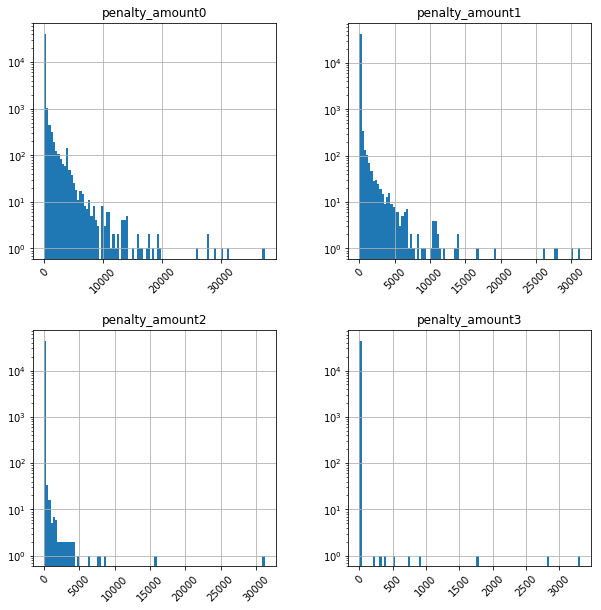

In [30]:
fig, axes = plt.subplots(2, 2)
for i in range(4):
    dftmp.hist('penalty_amount'+str(i), log=True, bins=100, ax=axes[int(i/2),i%2])
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)
plt.show()

In [ ]:
df.startTime.dt.normalize().value_counts().sort_index().index.strftime('%Y-%m-%d')

In [143]:
from scipy.stats import pearsonr
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

import re
case_penalty = case[[x for x in case.columns.tolist() if re.match('penalty_(?!amount)', x)]]
case_corr = case_penalty.corr()
case_pvalue = calculate_pvalues(case_penalty)

r1 = case_corr.applymap(lambda x: '{:.2f}*'.format(x))
r2 = case_corr.applymap(lambda x: '{:.2f}**'.format(x))
r3 = case_corr.applymap(lambda x: '{:.2f}***'.format(x))
case_corr = case_corr.mask(case_pvalue<=0.1,r1)
case_corr = case_corr.mask(case_pvalue<=0.05,r2)
case_corr = case_corr.mask(case_pvalue<=0.01,r3)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(case_corr)
# sorted(np.unique(case_pvalue.values.flatten()))

,penalty_JLP5,penalty_JLP6,penalty_JLP7,penalty_AGP,penalty_JLP1,penalty_JLP2,penalty_JLP3,penalty_C16,penalty_B16,penalty_B5F,penalty_B6,penalty_GP1,penalty_B4,penalty_B5,penalty_AVGP,penalty_B2,penalty_B3,penalty_AVJLP,penalty_C9,penalty_ABP,penalty_AVBP,penalty_AVUVP,penalty_C4,penalty_V5,penalty_CC,penalty_AJLP,penalty_BGKV,penalty_BGK,penalty_BGP,penalty_AUVP
penalty_JLP5,1.00***,-0.00127308,0.20***,-0.00304935,0.17***,0.21***,0.23***,-0.000255294,-0.00120432,-0.000342528,-0.00126793,0.00287038,-0.00158123,0.01***,-0.000161456,-0.00342531,-0.00326931,-0.000197745,-0.000582299,-0.00305376,-0.000161456,-0.000161456,-0.00213822,-0.000114166,0.00683995,-0.000892274,-0.000442232,0.01**,0.01*,-0.00331861
penalty_JLP6,-0.00127308,1.00***,-0.000254547,0.00346624,-0.00331547,-0.00170841,-0.000881887,-0.00056921,-0.00268519,-0.000763711,-0.002827,0.01*,-0.00352556,-0.00318493,-0.000359988,-0.00744202,-0.00728934,-0.000440898,-0.00129831,0.00344205,-0.000359988,-0.000359988,7.25853e-05,-0.000254547,0.01*,-0.00198944,-0.000986014,0.00617111,0.00443471,0.00206086
penalty_JLP7,0.20***,-0.000254547,1.00***,-0.000609702,-0.00029732,-0.000153204,-7.90846e-05,-5.10448e-05,-0.000240799,-6.84869e-05,-0.000253516,-0.00113108,-0.00031616,-0.000285613,-3.22825e-05,-0.00285497,-0.000653682,-3.95382e-05,-0.000116428,-0.000610585,-3.22825e-05,-3.22825e-05,-0.000427527,-2.28269e-05,-0.000849651,-0.000178406,-8.84223e-05,0.06***,-0.000442145,-0.00066354
penalty_AGP,-0.00304935,0.00346624,-0.000609702,1.00***,-0.00207641,0.00158281,-0.00211234,-0.0013634,0.000800309,0.01**,0.02***,-0.01***,-0.000167214,0.01***,-0.000862259,-0.04***,0.02***,-0.00105606,-0.00310977,0.98***,-0.000862259,-0.000862259,0.00086746,-0.000609702,-0.000548753,0.20***,-0.00236174,0.00514069,0.00602081,0.89***
penalty_JLP1,0.17***,-0.00331547,-0.00029732,-0.00207641,1.00***,0.35***,0.09***,-0.000664858,-0.0031364,-0.000892042,-0.00330204,0.00497857,0.01***,0.01*,-0.000420479,0.02***,0.00519446,-0.000514985,-0.00151647,0.000832278,-0.000420479,-0.000420479,0.02***,-0.00029732,0.01**,0.00755118,-0.0011517,-0.00510635,-0.00174587,0.00757244
penalty_JLP2,0.21***,-0.00170841,-0.000153204,0.00158281,0.35***,1.00***,0.04***,-0.000342591,-0.00161614,-0.000459655,-0.00170149,-0.00441267,-0.00212193,-0.00191692,-0.000216666,0.01***,0.00622425,-0.000265364,-0.000781415,0.00156895,-0.000216666,-0.000216666,-0.00286938,-0.000153204,-0.00156879,0.02***,-0.000593453,-0.00263122,-0.00296749,0.000776435
penalty_JLP3,0.23***,-0.000881887,-7.90846e-05,-0.00211234,0.09***,0.04***,1.00***,-0.000176847,-0.000834256,-0.000237275,-0.000878314,0.00223449,-0.00109535,-0.000989518,-0.000111844,-0.000493184,-0.00226471,-0.000136982,-0.000403369,-0.00211539,-0.000111844,-0.000111844,-0.00148118,-7.90846e-05,-0.00294365,-0.000618094,-0.000306342,-0.00135824,-0.00153183,-0.00229886
penalty_C16,-0.000255294,-0.00056921,-5.10448e-05,-0.0013634,-0.000664858,-0.000342591,-0.000176847,1.00***,-0.000538467,-0.000153148,-0.000566904,0.00700239,-0.000706988,0.07***,-7.21891e-05,0.0033212,-0.00146175,-8.84142e-05,-0.000260353,-0.00136537,-7.21891e-05,-7.21891e-05,0.02***,-5.10448e-05,-0.00189996,-0.000398946,-0.000197727,-0.000876673,0.02***,-0.00148379
penalty_B16,-0.00120432,-0.00268519,-0.000240799,0.000800309,-0.0031364,-0.00161614,-0.000834256,-0.000538467,1.00***,-0.000722462,0.05***,-0.00180449,-0.00333514,-0.00301291,-0.000340545,0.00494319,0.06***,-0.000417085,0.02***,-0.006441,-0.000340545,-0.000340545,-0.00450994,-0.000240799,-0.00369493,-0.00188199,-0.000932758,-0.00413561,-0.00466415,-0.00699962
penalty_B5F,-0.000342528,-0.000763711,-6.84869e-05,0.01**,-0.000892042,-0.000459655,-0.000237275,-0.000153148,-0.000722462,1.00***,-0.000760616,0.00371126,-0.000948567,0.24***,-9.68562e-05,-0.01*,-0.00196123,-0.000118625,-0.000349316,-0.00183192,-9.68562e-05,-9.68562e-05,-0.0012827,-6.84869e-05,-0.00254919,-0.000535266,-0.000265291,-0.00117623,0.02***,-0.0019908


In [2]:
case_penalty

NameError: name 'case_penalty' is not defined

In [146]:
with open('../insights/penalty_corr_with_significant_level.html', 'w') as f:
    f.write(case_corr.to_html())

In [176]:
dftmp = df.groupby('case').count()
dftmp.sort_values(['event'],ascending=False)

,event,startTime,completeTime,penalty_JLP5,penalty_JLP6,penalty_JLP7,penalty_AGP,penalty_JLP1,penalty_JLP2,penalty_JLP3,...,subprocess,org:resource,event_identity:id,eventid,docid_uuid,docid,doctype,success,activity,note
case,,,,,,,,,,,,,,,,,,,,,
93deb55be9aed2be,2973,2973,2973,2973,2973,2973,2973,2973,2973,2973,...,2973,2973,2973,2971,2973,2973,2973,2973,2973,2972
22b697e259a77e16,2490,2490,2490,2490,2490,2490,2490,2490,2490,2490,...,2490,2490,2490,2488,2490,2490,2490,2490,2490,2489
00101d737b58ff45,907,907,907,907,907,907,907,907,907,907,...,907,907,907,905,907,907,907,907,907,906
6dcac1562d4ca766,864,864,864,864,864,864,864,864,864,864,...,864,864,864,862,864,864,864,864,864,863
f8ad3caa0d29795c,788,788,788,788,788,788,788,788,788,788,...,788,788,788,786,788,788,788,788,788,787
026071d0f44f9fc3,766,766,766,766,766,766,766,766,766,766,...,766,766,766,764,766,766,766,766,766,765
c1a0475c0b61315a,723,723,723,723,723,723,723,723,723,723,...,723,723,723,721,723,723,723,723,723,722
0335f6ffa7af65de,713,713,713,713,713,713,713,713,713,713,...,713,713,713,711,713,713,713,713,713,712
99a08748cb4887fe,685,685,685,685,685,685,685,685,685,685,...,685,685,685,683,685,685,685,685,685,684


In [182]:
df.groupby('selected_manually').agg({'case': pd.Series.nunique})

,case
selected_manually,
False,43486
True,323


In [183]:
len(df[df.event == 'abort payment'].case.unique())

26633

In [189]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(case[case.risk_factor == 0.99])

,penalty_JLP5,penalty_JLP6,penalty_JLP7,penalty_AGP,penalty_JLP1,penalty_JLP2,penalty_JLP3,penalty_C16,payment_actual3,payment_actual2,payment_actual1,payment_actual0,rejected,amount_applied1,year,penalty_B16,amount_applied0,amount_applied3,amount_applied2,penalty_B5F,penalty_B6,penalty_GP1,penalty_B4,penalty_B5,penalty_AVGP,penalty_B2,selected_random,penalty_B3,cross_compliance,penalty_AVJLP,young farmer,penalty_C9,penalty_ABP,department,penalty_AVBP,small farmer,penalty_AVUVP,penalty_C4,penalty_V5,area,risk_factor,penalty_CC,redistribution,penalty_amount0,penalty_amount1,penalty_amount2,penalty_AJLP,penalty_amount3,number_parcels,selected_risk,penalty_BGKV,penalty_BGK,penalty_BGP,penalty_AUVP,selected_manually,timely
case,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
e39a74e42e48dc03,False,False,False,False,False,False,False,False,0.0,0.0,564.54,58186.3,False,59023.44,2015,False,59026.68,0.0,0.0,False,False,False,False,False,False,True,False,False,0.0,False,False,False,False,0,False,False,False,False,False,196.0668,0.99,False,True,245.59,252.6,0.0,False,0.0,65,False,False,False,False,False,False,0


In [192]:
case.groupby('selected_risk').count()

,penalty_JLP5,penalty_JLP6,penalty_JLP7,penalty_AGP,penalty_JLP1,penalty_JLP2,penalty_JLP3,penalty_C16,payment_actual3,payment_actual2,...,penalty_amount2,penalty_AJLP,penalty_amount3,number_parcels,penalty_BGKV,penalty_BGK,penalty_BGP,penalty_AUVP,selected_manually,timely
selected_risk,,,,,,,,,,,,,,,,,,,,,
False,42002,42002,42002,42002,42002,42002,42002,42002,42002,42002,...,42002,42002,42002,42002,42002,42002,42002,42002,42002,42002
True,1807,1807,1807,1807,1807,1807,1807,1807,1807,1807,...,1807,1807,1807,1807,1807,1807,1807,1807,1807,1807


In [195]:
case[(case.selected_risk != True) & (case.selected_random != True) & (case.selected_manually != True)]

,penalty_JLP5,penalty_JLP6,penalty_JLP7,penalty_AGP,penalty_JLP1,penalty_JLP2,penalty_JLP3,penalty_C16,payment_actual3,payment_actual2,...,penalty_AJLP,penalty_amount3,number_parcels,selected_risk,penalty_BGKV,penalty_BGK,penalty_BGP,penalty_AUVP,selected_manually,timely
case,,,,,,,,,,,,,,,,,,,,,
43cc0569f6aeeedb,False,False,False,False,False,False,False,False,0.0,0.0,...,False,0.0,1,True,False,False,False,False,True,1
2ab337a01a7b5637,False,False,False,False,False,False,False,False,0.0,0.0,...,False,0.0,4,True,False,False,False,False,True,1
40f32cdab694d4a1,False,False,False,False,False,False,False,False,0.0,0.0,...,False,0.0,5,True,False,False,False,True,True,1
5a0a679306b0226b,False,False,False,False,False,False,False,False,0.0,0.0,...,False,0.0,4,True,False,False,False,False,True,1
fd2488239a373997,False,False,False,False,False,False,False,False,0.0,0.0,...,False,0.0,14,True,False,False,False,False,True,0
2e1f6e12694e147f,False,False,False,False,False,False,False,False,0.0,0.0,...,False,0.0,2,True,False,False,False,False,True,1
239d8bab0352d568,False,False,False,False,False,False,False,False,0.0,0.0,...,False,0.0,5,True,False,False,False,False,True,1
9673c2f056292304,False,False,False,False,False,False,False,False,0.0,0.0,...,False,0.0,17,True,False,False,False,False,True,1
dc843d1afcad3383,False,False,False,False,False,False,False,False,0.0,0.0,...,False,0.0,11,True,False,False,False,False,True,1


In [211]:
dftmp = df[df.doctype != 'Inspection']
dftmp[dftmp.penalty_amount0 >0]

,case,event,startTime,completeTime,penalty_JLP5,penalty_JLP6,penalty_JLP7,penalty_AGP,penalty_JLP1,penalty_JLP2,...,subprocess,org:resource,event_identity:id,eventid,docid_uuid,docid,doctype,success,activity,note
52,d038e6a5fcaed7a4,mail income,2015-05-08 06:00:00.000,2015-05-08 06:00:00.000,False,False,False,False,False,False,...,Application,0;n/a,00F76F16-4E65-4282-94B5-58F3AF7BD0F8,NaN,20DC5603-102C-4D12-8A77-1C9211AC99A5,-18008611496121228,Payment application,True,mail income,none
53,d038e6a5fcaed7a4,mail valid,2015-05-12 06:00:00.000,2015-05-12 06:00:00.000,False,False,False,False,False,False,...,Main,0;n/a,11F70E83-9957-4422-A740-1965E20DC61C,NaN,038E58E3-9C74-443C-B506-8C921EED8E54,-18008615298950832,Entitlement application,True,mail valid,none
54,d038e6a5fcaed7a4,mail valid,2015-05-12 06:00:00.000,2015-05-12 06:00:00.000,False,False,False,False,False,False,...,Application,0;n/a,4DE3AA5C-EBEA-43B3-8384-8CD7853C5D9D,NaN,20DC5603-102C-4D12-8A77-1C9211AC99A5,-18008611496121228,Payment application,True,mail valid,none
55,d038e6a5fcaed7a4,mail valid,2015-05-12 06:00:00.000,2015-05-12 06:00:00.000,False,False,False,False,False,False,...,Main,0;n/a,E42A41C4-88BB-4409-BC22-9FC530994EDF,NaN,038E58E3-9C74-443C-B506-8C921EED8E54,-18008615298950832,Entitlement application,True,mail valid,none
56,d038e6a5fcaed7a4,initialize,2015-06-12 17:52:18.000,2015-06-12 17:52:18.000,False,False,False,False,False,False,...,Main,Document processing automaton,A01E11F9-FCEA-41A7-9F6B-6D692DD0DE47,-1.800866e+16,FE94083C-121F-4374-BC20-A01BEDB3D131,-18008662112586037,Parcel document,True,initialize,none
57,d038e6a5fcaed7a4,begin editing,2015-06-12 17:52:18.000,2015-06-12 17:52:18.000,False,False,False,False,False,False,...,Main,Document processing automaton,3451CAA1-3A4F-44B1-9B4A-EE5AEDA3BCE8,-1.800866e+16,FE94083C-121F-4374-BC20-A01BEDB3D131,-18008662112586037,Parcel document,True,begin editing,none
58,d038e6a5fcaed7a4,initialize,2015-06-12 17:52:20.000,2015-06-12 17:52:20.000,False,False,False,False,False,False,...,Main,Document processing automaton,27C1295A-41C2-4D93-AF1A-A45EC6890496,-1.800866e+16,D6325DC0-6923-48D8-B994-FE6610AADCDA,-18008662112585369,Control summary,True,initialize,none
59,d038e6a5fcaed7a4,begin editing,2015-06-12 17:52:20.000,2015-06-12 17:52:20.000,False,False,False,False,False,False,...,Main,Document processing automaton,DF268CBC-11F4-4D7C-88E2-B469BA564F04,-1.800866e+16,D6325DC0-6923-48D8-B994-FE6610AADCDA,-18008662112585369,Control summary,True,begin editing,none
60,d038e6a5fcaed7a4,finish editing,2015-06-12 17:52:20.000,2015-06-12 17:52:20.000,False,False,False,False,False,False,...,Main,Document processing automaton,5774C2A3-832F-4044-8D66-521D8CC54B5E,-1.800866e+16,D6325DC0-6923-48D8-B994-FE6610AADCDA,-18008662112585369,Control summary,True,finish editing,none
61,d038e6a5fcaed7a4,insert document,2015-07-09 21:52:57.000,2015-07-09 21:52:57.000,False,False,False,False,False,False,...,Main,167893,3F387B0F-8B02-408F-B601-37CE6BBD27B1,-9.006625e+16,FE94083C-121F-4374-BC20-A01BEDB3D131,-18008662112586037,Parcel document,True,insert document,none


In [218]:
case[~(case[[x for x in case.columns.tolist() if re.match('penalty_(?!amount)', x)]] == False)].penalty_amount0.unique()

array([nan])

In [221]:
case[[x for x in case.columns.tolist() if re.match('penalty_(?!amount)', x)]]

,penalty_JLP5,penalty_JLP6,penalty_JLP7,penalty_AGP,penalty_JLP1,penalty_JLP2,penalty_JLP3,penalty_C16,penalty_B16,penalty_B5F,...,penalty_AVBP,penalty_AVUVP,penalty_C4,penalty_V5,penalty_CC,penalty_AJLP,penalty_BGKV,penalty_BGK,penalty_BGP,penalty_AUVP
case,,,,,,,,,,,,,,,,,,,,,
8b99873a6136cfa6,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
d038e6a5fcaed7a4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
d0c4a4241daa1d89,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
beb37ac32c4dfd60,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
accaf25e4ea7629a,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
314f58d466e29977,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
f2e0550f00b5373b,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
cf28ee3fa1c5d463,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1fa3097a021d75ec,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [244]:
seta = set(df[df['subprocess'] == 'On-Site'].case.unique())
setb = set(df[df['subprocess'] == 'Remote'].case.unique())
setc = set(df[df.doctype == 'Inspection'].case.unique())
print(len(setc - setb - seta))
print(len(set.union(seta, setb) - setc))
print(len(set.intersection(seta, setb)))

0
0
1758


In [309]:
seta = set(df[df['doctype'] == 'Inspection'].case.unique())
setb = set(df[(df.selected_risk == True) | (df.selected_random == True) | (df.selected_manually == True)].case.unique())
print(len(setb - seta))
print(len(seta - setb))
print(len(set.intersection(seta, setb)))

0
47
2997


In [250]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df[(df.selected_risk == True) | (df.selected_random == True) | (df.selected_manually == True)][:100])

,case,event,startTime,completeTime,penalty_JLP5,penalty_JLP6,penalty_JLP7,penalty_AGP,penalty_JLP1,penalty_JLP2,penalty_JLP3,penalty_C16,payment_actual3,payment_actual2,payment_actual1,payment_actual0,rejected,amount_applied1,year,penalty_B16,amount_applied0,amount_applied3,amount_applied2,penalty_B5F,penalty_B6,penalty_GP1,penalty_B4,penalty_B5,penalty_AVGP,penalty_B2,selected_random,penalty_B3,cross_compliance,penalty_AVJLP,applicant,young farmer,penalty_C9,penalty_ABP,department,penalty_AVBP,small farmer,penalty_AVUVP,penalty_C4,identity:id,penalty_V5,area,risk_factor,penalty_CC,redistribution,application,penalty_amount0,penalty_amount1,penalty_amount2,penalty_AJLP,penalty_amount3,greening,number_parcels,selected_risk,penalty_BGKV,penalty_BGK,penalty_BGP,basic payment,program-id,penalty_AUVP,selected_manually,subprocess,org:resource,event_identity:id,eventid,docid_uuid,docid,doctype,success,activity,note
757,6a64ce3f5768249b,mail income,2015-05-15 06:00:00.000,2015-05-15 06:00:00.000,False,False,False,False,False,False,False,False,NaN,NaN,NaN,1191.87,False,NaN,2015,False,1191.87,NaN,NaN,False,False,False,False,False,False,False,True,False,0.0,False,78b93500550eeca3,False,False,False,4e,False,False,False,False,1DE36491-BEF4-4FCE-90FC-918FE05683A8,False,3.6061,1.0,False,True,6a64ce3f5768249b,0.00,NaN,NaN,False,NaN,True,1,True,False,False,False,True,215,False,False,Application,0;n/a,33CB38E9-AFF5-4504-9740-CFDE4A9145E6,NaN,C547E9A9-3DBB-48D6-AFC7-69089B7BAF17,-18008611495810347,Payment application,True,mail income,none
758,6a64ce3f5768249b,mail valid,2015-05-15 06:00:00.000,2015-05-15 06:00:00.000,False,False,False,False,False,False,False,False,NaN,NaN,NaN,1191.87,False,NaN,2015,False,1191.87,NaN,NaN,False,False,False,False,False,False,False,True,False,0.0,False,78b93500550eeca3,False,False,False,4e,False,False,False,False,1DE36491-BEF4-4FCE-90FC-918FE05683A8,False,3.6061,1.0,False,True,6a64ce3f5768249b,0.00,NaN,NaN,False,NaN,True,1,True,False,False,False,True,215,False,False,Application,0;n/a,35674411-6163-4E80-908C-16CB85669E9B,NaN,C547E9A9-3DBB-48D6-AFC7-69089B7BAF17,-18008611495810347,Payment application,True,mail valid,none
759,6a64ce3f5768249b,mail valid,2015-05-15 06:00:00.000,2015-05-15 06:00:00.000,False,False,False,False,False,False,False,False,NaN,NaN,NaN,1191.87,False,NaN,2015,False,1191.87,NaN,NaN,False,False,False,False,False,False,False,True,False,0.0,False,78b93500550eeca3,False,False,False,4e,False,False,False,False,1DE36491-BEF4-4FCE-90FC-918FE05683A8,False,3.6061,1.0,False,True,6a64ce3f5768249b,0.00,NaN,NaN,False,NaN,True,1,True,False,False,False,True,215,False,False,Main,0;n/a,06446D5F-89BD-4507-B269-795F072DA04C,NaN,B3E9E746-0A36-4E64-9542-FF5CDA55E41C,-18008615298854746,Entitlement application,True,mail valid,none
760,6a64ce3f5768249b,mail valid,2015-05-15 06:00:00.000,2015-05-15 06:00:00.000,False,False,False,False,False,False,False,False,NaN,NaN,NaN,1191.87,False,NaN,2015,False,1191.87,NaN,NaN,False,False,False,False,False,False,False,True,False,0.0,False,78b93500550eeca3,False,False,False,4e,False,False,False,False,1DE36491-BEF4-4FCE-90FC-918FE05683A8,False,3.6061,1.0,False,True,6a64ce3f5768249b,0.00,NaN,NaN,False,NaN,True,1,True,False,False,False,True,215,False,False,Main,0;n/a,36DE8630-67EA-4EEC-B921-3EDAFD832859,NaN,B3E9E746-0A36-4E64-9542-FF5CDA55E41C,-18008615298854746,Entitlement application,True,mail valid,none
761,6a64ce3f5768249b,initialize,2015-06-12 19:57:29.000,2015-06-12 19:57:29.000,False,False,False,False,False,False,False,False,NaN,NaN,NaN,1191.87,False,NaN,2015,False,1191.87,NaN,NaN,False,False,False,False,False,False,False,True,False,0.0,False,78b93500550eeca3,False,False,False,4e,False,False,False,False,1DE36491-BEF4-4FCE-90FC-918FE05683A8,False,3.6061,1.0,False,True,6a64ce3f5768249b,0.00,NaN,NaN,False,NaN,True,1,True,False,False,False,True,215,False,False,Main,Document processing automaton,C14971CF-16BE-408D-8DBB-C0E67FC5A38C,-1.800866e+16,843CD809-03AA-408B-8599-F4CC79CDF65B,-18008

In [259]:
dftmp = case_penalty.replace([False, True], [0, 1])
dftmp['p'] = 0.
for x in [x for x in case.columns.tolist() if re.match('penalty_(?!amount)', x)]:
    dftmp['p'] += dftmp[x]

In [265]:
dftmp.sort_values(['p'], ascending=False).groupby('p').count()

,penalty_JLP5,penalty_JLP6,penalty_JLP7,penalty_AGP,penalty_JLP1,penalty_JLP2,penalty_JLP3,penalty_C16,penalty_B16,penalty_B5F,...,penalty_AVBP,penalty_AVUVP,penalty_C4,penalty_V5,penalty_CC,penalty_AJLP,penalty_BGKV,penalty_BGK,penalty_BGP,penalty_AUVP
p,,,,,,,,,,,,,,,,,,,,,
0.0,28086,28086,28086,28086,28086,28086,28086,28086,28086,28086,...,28086,28086,28086,28086,28086,28086,28086,28086,28086,28086
1.0,12377,12377,12377,12377,12377,12377,12377,12377,12377,12377,...,12377,12377,12377,12377,12377,12377,12377,12377,12377,12377
2.0,2346,2346,2346,2346,2346,2346,2346,2346,2346,2346,...,2346,2346,2346,2346,2346,2346,2346,2346,2346,2346
3.0,787,787,787,787,787,787,787,787,787,787,...,787,787,787,787,787,787,787,787,787,787
4.0,175,175,175,175,175,175,175,175,175,175,...,175,175,175,175,175,175,175,175,175,175
5.0,29,29,29,29,29,29,29,29,29,29,...,29,29,29,29,29,29,29,29,29,29
6.0,7,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
7.0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [272]:
len(df[df.doctype == 'Inspection'].case.unique())

3044

In [273]:
df[(df.doctype == 'Inspection') & (df.penalty_JLP5 == True)].groupby(['case']).count()

,event,startTime,completeTime,penalty_JLP5,penalty_JLP6,penalty_JLP7,penalty_AGP,penalty_JLP1,penalty_JLP2,penalty_JLP3,...,subprocess,org:resource,event_identity:id,eventid,docid_uuid,docid,doctype,success,activity,note
case,,,,,,,,,,,,,,,,,,,,,
221a495ce2af6974,148,148,148,148,148,148,148,148,148,148,...,148,148,148,148,148,148,148,148,148,148
284b57a0b415a8fc,47,47,47,47,47,47,47,47,47,47,...,47,47,47,47,47,47,47,47,47,46
64f91a3549d6fbc2,69,69,69,69,69,69,69,69,69,69,...,69,69,69,69,69,69,69,69,69,69
bbe7c4ed804d3cb1,41,41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,41,41,41,41
c22d9766232ba435,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33


In [281]:
ITPT = {}
IFPT = {}
ITPF = {}
IFPF = {}
IPT = {}
for x in [x for x in case.columns.tolist() if re.match('penalty_(?!amount)', x)]:
    ITPT[x] = len(df[(df.doctype == 'Inspection') & (df[x] == True)].case.unique())
    IFPT[x] = len(df[(df.doctype != 'Inspection') & (df[x] == True)].case.unique())
    IPT[x] = ITPT[x] / (ITPT[x] + IFPT[x])
    ITPF[x] = len(df[(df.doctype == 'Inspection') & (df[x] == False)].case.unique())
    IFPF[x] = len(df[(df.doctype != 'Inspection') & (df[x] == False)].case.unique())

In [284]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(pd.DataFrame.from_dict([ITPT, IFPT, ITPF, IFPF, IPT]).T.sort_values(4, ascending=False).T)

,penalty_JLP7,penalty_BGKV,penalty_C16,penalty_B5,penalty_BGK,penalty_B5F,penalty_AVJLP,penalty_BGP,penalty_B6,penalty_JLP5,penalty_B16,penalty_B3,penalty_GP1,penalty_C9,penalty_B4,penalty_JLP1,penalty_AUVP,penalty_AGP,penalty_B2,penalty_ABP,penalty_CC,penalty_AJLP,penalty_JLP6,penalty_C4,penalty_JLP2,penalty_AVUVP,penalty_AVGP,penalty_JLP3,penalty_AVBP,penalty_V5
0,0.5,0.464286,0.375,0.373494,0.33105,0.307692,0.25,0.2,0.168919,0.166667,0.146154,0.137192,0.136009,0.103448,0.103286,0.096257,0.080931,0.07753,0.076806,0.074901,0.064763,0.061538,0.060606,0.046575,0.021739,0.0,0.0,0.0,0.0,0.0
1,1.0,15.000000,5.000,156.000000,293.00000,9.000000,3.00,372.0,123.000000,25.000000,111.000000,805.000000,2325.000000,26.000000,191.000000,169.000000,829.000000,702.00000,11527.000000,704.000000,1343.000000,61.000000,124.000000,348.000000,45.000000,2.0,2.0,12.0,2.0,1.0
2,3043.0,3031.000000,3041.000,2951.000000,2899.00000,3040.000000,3043.00,2951.0,3019.000000,3039.000000,3025.000000,2916.000000,2678.000000,3041.000000,3022.000000,3026.000000,2971.000000,2985.00000,2085.000000,2987.000000,2951.000000,3040.000000,3036.000000,3027.000000,3043.000000,3044.0,3044.0,3044.0,3044.0,3044.0
3,43808.0,43794.000000,43804.000,43653.000000,43516.00000,43800.000000,43806.00,43437.0,43686.000000,43784.000000,43698.000000,43004.000000,41484.000000,43783.000000,43618.000000,43640.000000,42980.000000,43107.00000,32282.000000,43105.000000,42466.000000,43748.000000,43685.000000,43461.000000,43764.000000,43807.0,43807.0,43797.0,43807.0,43808.0


In [291]:
severe_penalty_nameList = []
for x in 'B3, B4, B5, B6, B16, BGK, C16, JLP3, V5'.split(', '):
    severe_penalty_nameList.append('penalty_' + x)
case[severe_penalty_nameList]

,penalty_B3,penalty_B4,penalty_B5,penalty_B6,penalty_B16,penalty_BGK,penalty_C16,penalty_JLP3,penalty_V5
case,,,,,,,,,
8b99873a6136cfa6,False,False,False,False,False,False,False,False,False
d038e6a5fcaed7a4,False,False,False,False,False,False,False,False,False
d0c4a4241daa1d89,False,False,False,False,False,False,False,False,False
beb37ac32c4dfd60,False,False,False,False,False,False,False,False,False
accaf25e4ea7629a,False,False,False,False,False,False,False,False,False
314f58d466e29977,False,False,False,False,False,False,False,False,False
f2e0550f00b5373b,False,False,False,False,False,False,False,False,False
cf28ee3fa1c5d463,False,False,False,False,False,False,False,False,False
1fa3097a021d75ec,False,False,False,False,False,False,False,False,False


In [305]:
df[df.event == 'plan']

,case,event,startTime,completeTime,penalty_JLP5,penalty_JLP6,penalty_JLP7,penalty_AGP,penalty_JLP1,penalty_JLP2,...,subprocess,org:resource,event_identity:id,eventid,docid_uuid,docid,doctype,success,activity,note
768,6a64ce3f5768249b,plan,2015-07-10 21:59:06.364,2015-07-10 21:59:06.364,False,False,False,False,False,False,...,Remote,Inspection automaton,3EF5A8E8-1E1C-41E4-80BD-49485D44D38D,-1.080806e+17,4EE64E2B-03B8-4807-8B52-9D4CD32464F2,-108080645180670553,Inspection,True,plan,none
1121,139ce87f8bb4d9b5,plan,2015-07-19 21:51:00.224,2015-07-19 21:51:00.224,False,False,False,False,False,False,...,Remote,Inspection automaton,D0171334-1C38-44E0-B4C6-1A06164765C1,-9.006624e+16,0139BDAB-FFB7-43C2-970D-2486F021968F,-90066243529713912,Inspection,True,plan,none
1142,139ce87f8bb4d9b5,plan,2015-09-16 00:24:28.568,2015-09-16 00:24:28.568,False,False,False,False,False,False,...,On-Site,Inspection automaton,0F7DC254-CB96-4034-9AC8-B29085D6D88D,-1.080806e+17,2349CFA9-7772-4672-A3FA-7B233F9215E0,-108080622030397018,Inspection,True,plan,none
2317,6186687c81469fd0,plan,2015-08-18 13:15:50.849,2015-08-18 13:15:50.849,False,False,False,False,False,False,...,On-Site,Inspection automaton,681D19FA-1CF5-4D1E-AD5E-26CAA092BC32,-1.080806e+17,7CC01D3D-238B-4867-98D0-FEED48D10FAC,-108080632047838578,Inspection,True,plan,none
2755,249e5790e426a6fb,plan,2015-08-18 13:15:42.928,2015-08-18 13:15:42.928,False,False,False,False,False,False,...,On-Site,Inspection automaton,CA159DEC-9E1F-47F4-8DC6-8FA5B67A193B,-1.080806e+17,451E3326-A9EE-4DD8-B3A3-5EA8A7BCE697,-108080632047839010,Inspection,True,plan,none
3218,e195f03f6d352f8d,plan,2015-07-10 21:57:17.049,2015-07-10 21:57:17.049,False,False,False,False,False,False,...,Remote,Inspection automaton,64699EBE-DA0B-4F59-B9F1-D0F9CA27D121,-1.080806e+17,6555F10F-EF29-48DC-88E7-62C361490F3D,-108080645180680989,Inspection,True,plan,none
3530,08d4dc60fe8a5bf9,plan,2015-07-10 21:59:36.757,2015-07-10 21:59:36.757,False,False,False,False,False,False,...,Remote,Inspection automaton,7CE8AC8A-5445-4B1F-A23C-B217E7B7D5EF,-1.080806e+17,DD3D713D-E384-4C30-A1D2-57A19A489047,-108080645180667545,Inspection,True,plan,none
4495,778d8e11527d1b97,plan,2015-07-19 21:51:12.293,2015-07-19 21:51:12.293,False,False,False,True,False,False,...,Remote,Inspection automaton,5BD7F8E0-5AAB-4F7A-B858-CACF7C8E6AF8,-9.006624e+16,088A88AD-4DDC-42BA-BBD0-90A369A3263E,-90066243529712714,Inspection,True,plan,none
4515,778d8e11527d1b97,plan,2015-09-14 22:18:56.756,2015-09-14 22:18:56.756,False,False,False,True,False,False,...,On-Site,Inspection automaton,9599ED4B-3D9F-47C1-910E-C1CAF8C1C9A7,-9.006622e+16,6BEB38CD-66C4-486E-829E-902D65B83287,-90066223867261258,Inspection,True,plan,none
4733,1274f0888b2a99cf,plan,2015-07-10 21:57:04.942,2015-07-10 21:57:04.942,False,False,False,False,False,False,...,Remote,Inspection automaton,186B2F33-971C-4687-A091-BFA06CAF874A,-1.080806e+17,1F553840-1228-4642-9EE1-819B8BE7DA82,-108080645180682133,Inspection,True,plan,none


In [308]:
with open('123.html', 'w') as f:
    f.write(df[df.case == '29eaa7e732de457b'].to_html())

In [1]:
case.groupby('department').count()

NameError: name 'case' is not defined

In [47]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df[(df.rejected==True) & (df.subprocess=='Change')])

,case,event,startTime,completeTime,penalty_JLP5,penalty_JLP6,penalty_JLP7,penalty_AGP,penalty_JLP1,penalty_JLP2,penalty_JLP3,penalty_C16,payment_actual3,payment_actual2,payment_actual1,payment_actual0,rejected,amount_applied1,year,penalty_B16,amount_applied0,amount_applied3,amount_applied2,penalty_B5F,penalty_B6,penalty_GP1,penalty_B4,penalty_B5,penalty_AVGP,penalty_B2,selected_random,penalty_B3,cross_compliance,penalty_AVJLP,applicant,young farmer,penalty_C9,penalty_ABP,department,penalty_AVBP,small farmer,penalty_AVUVP,penalty_C4,identity:id,penalty_V5,area,risk_factor,penalty_CC,redistribution,application,penalty_amount0,penalty_amount1,penalty_amount2,penalty_AJLP,penalty_amount3,greening,number_parcels,selected_risk,penalty_BGKV,penalty_BGK,penalty_BGP,basic payment,program-id,penalty_AUVP,selected_manually,subprocess,org:resource,event_identity:id,eventid,docid_uuid,docid,doctype,success,activity,note
5322,1c95bd641040016f,insert document,2016-05-23 13:53:52.615,2016-05-23 13:53:52.615,False,False,False,False,False,False,False,False,NaN,NaN,0.00,23.04,True,3378.93,2015,False,3378.93,NaN,NaN,False,False,False,False,False,False,False,False,False,0.0,False,a6c5f3a0b3bd444c,False,False,False,4e,False,False,False,False,5A57B99A-6A06-4B96-B5D0-37364880BA76,False,10.1754,1.0,False,True,1c95bd641040016f,0.00,0.00,NaN,False,NaN,True,11,False,False,False,False,True,215,False,False,Change,Document processing automaton,53031CBE-A0F6-40DB-BC86-FF8BB650F1C3,-1.080805e+17,6FDB9126-832F-40DC-A549-DA65EEEE5690,-18008615298879265,Entitlement application,True,insert document,objection
11470,35e0e5ad69d9e7b2,insert document,2016-05-24 17:55:53.112,2016-05-24 17:55:53.112,False,False,False,False,False,False,False,False,NaN,NaN,0.00,15.53,True,1259.29,2015,False,1259.29,NaN,NaN,False,False,False,False,False,False,False,False,False,0.0,False,93b63365e1cca4de,False,False,False,6b,False,True,False,False,73DB807D-A93C-48B0-A629-157515A347EB,False,3.7971,1.0,False,True,35e0e5ad69d9e7b2,0.00,0.00,NaN,False,NaN,True,9,False,False,False,False,True,215,False,False,Change,Document processing automaton,B46C73F8-AB03-4C8A-ACF3-985A068CD1E2,-1.800854e+16,D07B6704-54DA-457F-82DE-10FABC955BF1,-18008615299040929,Entitlement application,True,insert document,objection
48255,91ab09118e3403b6,insert document,2015-11-19 22:31:38.776,2015-11-19 22:31:38.776,False,False,False,False,False,False,False,False,NaN,NaN,NaN,25.60,True,NaN,2015,False,448.99,NaN,NaN,False,False,False,False,False,False,False,True,False,0.0,False,b16edfa10f69b329,False,False,False,6b,False,False,False,False,C95C0285-F541-434D-90B7-5ED8224965D6,False,1.2000,1.0,False,True,91ab09118e3403b6,0.00,NaN,NaN,False,NaN,True,1,True,False,False,False,True,215,False,False,Change,75992a,3055A9CD-1CFA-4271-9DA4-428983C4697D,-7.205180e+16,C15CD631-0AF3-4259-A4B8-D207F806F515,-18008615299043799,Entitlement application,True,insert document,manual note
57541,cabf431c722fcc80,insert document,2015-11-24 18:19:46.416,2015-11-24 18:19:46.416,False,False,False,False,False,False,False,False,NaN,NaN,2527.58,57.67,True,2585.45,2015,False,2585.45,NaN,NaN,False,False,False,False,False,False,False,True,False,0.0,False,91d49ce324d95595,False,False,False,e7,False,False,False,False,08460A63-E350-4ABF-A821-109D7DFE3722,False,7.4915,1.0,False,True,cabf431c722fcc80,0.00,0.00,NaN,False,NaN,True,4,True,False,False,False,True,215,False,False,Change,2ca0ae,1E831C86-170B-4912-94AF-1A835B7EAB34,-7.205180e+16,73796613-24FD-483A-81AC-1F21FCBD9C93,-18008615298721420,Entitlement application,True,insert document,manual note
57562,cabf431c722fcc80,insert document,2016-05-20 19:07:13.935,2016-05-20 19:07:13.935,False,False,False,False,False,False,False,False,NaN,NaN,2527.58,57.67,True,2585.45,2015,False,2585.45,NaN,NaN,False,False,False,False,False,False,False,True,False,0.0,False,91d49ce324d95595,False,False,False,e7,False,False,False,False,08460A63-E350-4ABF-A821-109D7DFE3722,False,7.4915,1.0,False,True,cabf431c722fcc80,0.00,0.00,NaN,Fal

In [45]:
df.event.unique()

array(['mail income', 'mail valid', 'initialize', 'begin editing',
       'finish editing', 'save', 'insert document', 'performed',
       'calculate', 'decide', 'begin payment', 'abort payment',
       'finish payment', 'revoke decision', 'check', 'remove document',
       'plan', 'finish preparations', 'begin preparations',
       'prepare external', 'abort external', 'prepare offline',
       'performed offline', 'withdraw', 'revoke withdrawal',
       'begin admissibility check', 'check admissibility', 'approve',
       'take original document', 'refuse', 'begin editing from refused',
       'revoke approval', 'discard', 'cancel offline',
       'change department', 'create', 'restart editing',
       'finish pre-check', 'calculate protocol', 'clear',
       'correction GFM17'], dtype=object)